# HW9 Question 2
Ross Freeman

$J(\rho) = \frac{\rho v_{max}} {\log(\frac{\rho_{max}}{\rho_{crit}})} \log(\frac{\rho_{max}}{\rho})\\ 
\frac{dJ}{d \rho} = \frac{v_{max}} {\log(\frac{\rho_{max}}{\rho_{crit}})} \log(\frac{\rho_{max}}{\rho}) - \frac{\rho v_{max}} {\log(\frac{\rho_{max}}{\rho_{crit}})} \frac{1}{\rho} = 0 \\
= \log(\frac{\rho_{max}}{\rho}) - 1 \\
= \log(\rho_{max}) - \log(\rho) - 1 = 0 \\
\log(\rho) = \log(\rho_{max}) - 1 \\
\rho = e^{\log(\rho_{max}) - 1} \\
\rho = \rho_{max} e ^{-1} \\
\rho^* = \frac{\rho_{max}}{e}
$

$\frac{d^2J}{d\rho^2} = -\frac{v_{max}}{\rho \log(\frac{p_{max}}{p_{crit}})}\\
\frac{d^2J}{d\rho^2}(\rho ^*) = -\frac{e v_{max}}{\rho_{max} \log(\frac{p_{max}}{p_{crit}})} < 0
$
This must be less than 0 since $\rho_{max}$ and $v_{max}$ must be greater than 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc

In [2]:
pmax = 2.5
pcrit = 0.5
vmax = 1.2

In [3]:
def velocity(p):
    if p > pcrit:
        return vmax/np.log(pmax/pcrit) * np.log(pmax/p)
    else:
        return vmax
def flux(p):
    return velocity(p) * p

In [4]:
vals = np.arange(0,pmax,0.1)
results = np.zeros((2, vals.size))

for (idx, val) in enumerate(vals):
    results[0][idx] = velocity(val)
    results[1][idx] = flux(val)

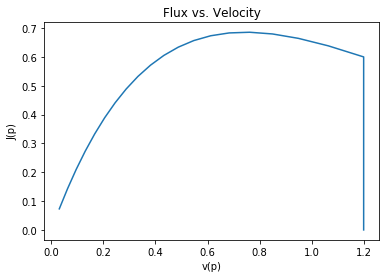

In [5]:
plt.figure()
plt.title("Flux vs. Velocity")
plt.xlabel('v(p)')
plt.ylabel('J(p)')
plt.plot(results[0], results[1], '-')
plt.show()

In [6]:
opt_p = sc.fmin(lambda x: -flux(x), 0)[0] # This is equal to p_max/e
print(1/opt_p) # Distance between cars (explained below)

Optimization terminated successfully.
         Current function value: -0.685729
         Iterations: 25
         Function evaluations: 50
1.08732585797


## Analysis

The above graph indicates that flux increases as velocity increases up until a specific density/velocity, at which point it slowly decreases, likely due to the decreasing number of cars. Once $\rho < \rho_{crit}$, the flux starts to dramatically drop since the cars cannot go any faster than the speed limit while the overall number of cars passing through decreases. For $\rho^* > \rho_{crit}$, the maximum flux occurs when the density is about $0.92$, after which point it starts to decrease. For $\rho^* < \rho_{crit}$, the maximum flux is exactly when $\rho^* = \rho_{crit}$ since the cars have already reached their maximum speed and decreasing the density any further would just result in a decrease in the number of cars moving at $v_{max}$. 

To determine the distance between cars, we know that $\frac{p_{max}}{e} = \frac{1}{d+l}$ where $d$ is the distance between cars and $l$ is the length of each car. Solving for $d+l$, we have $\frac{e}{p_{max}}$, which is equivalent to about 1.09 meters. Given that this is not that much distance, especially when taking the car's length into account, drivers would likely want to go much slower than the speed limit to avoid collisions due to sudden braking.